<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/newMethodTensorFlow/Notebook01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
! kaggle datasets download 'msambare/fer2013'

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 58% 35.0M/60.3M [00:00<00:00, 185MB/s] 
100% 60.3M/60.3M [00:00<00:00, 206MB/s]


In [8]:
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [9]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array

In [10]:
# Define image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 28709 files belonging to 7 classes.


In [12]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


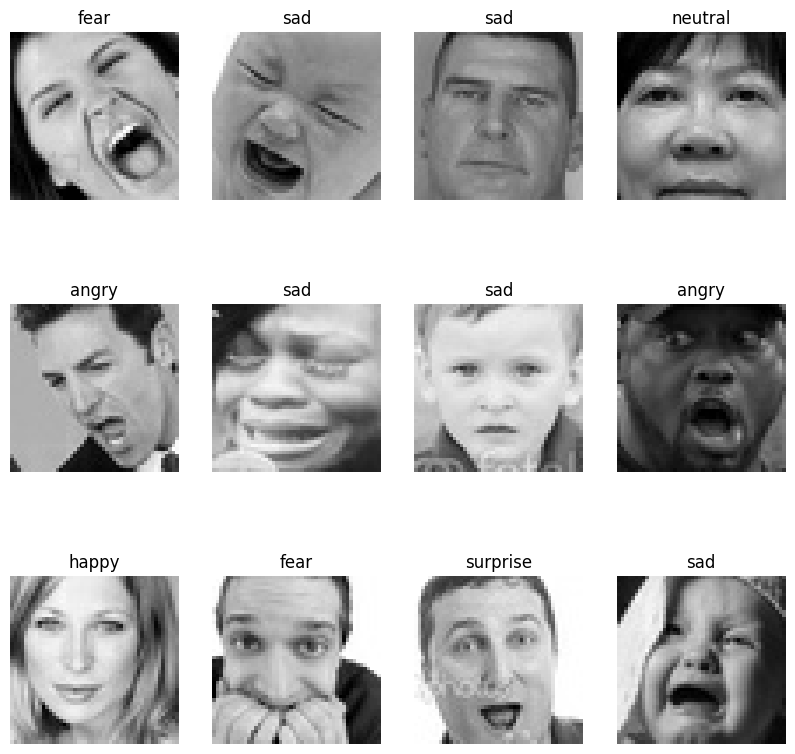

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

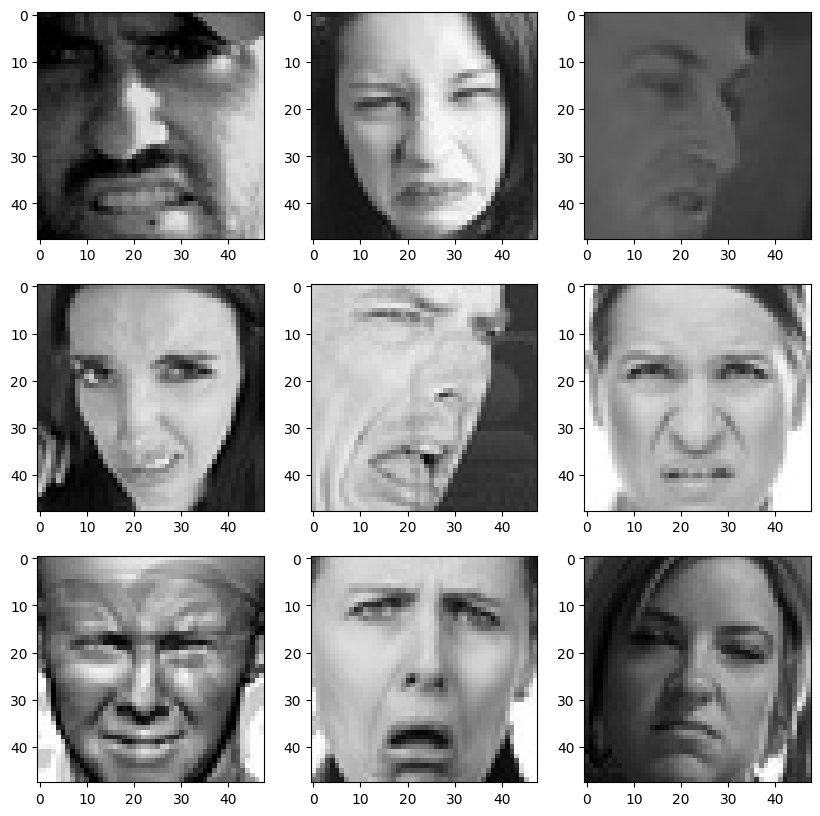

In [15]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("train/"+expression+"/"+
                  os.listdir( "train/" + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
plt.show()

In [16]:
train_data_dir='train/'
validation_data_dir='test/'

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize the pixel values to the range [0, 1]
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    shear_range=0.3, # Shear the image by up to 30%
    zoom_range=0.3, # Zoom in on the image by up to 30%
    horizontal_flip=True, # Randomly flip the images horizontally
    fill_mode='nearest' # Fill in any missing pixels after a transformation with the nearest pixel value
)

In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalize the pixel values to the range [0, 1]

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # Directory containing the training data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 28709 images belonging to 7 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory containing the validation data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 7178 images belonging to 7 classes.


In [21]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [22]:
img, label = train_generator.__next__() # img: (32, 48, 48, 1) label: (32, 7)

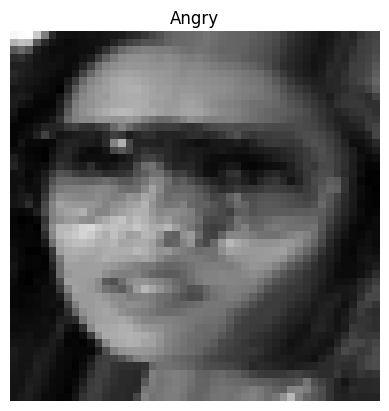

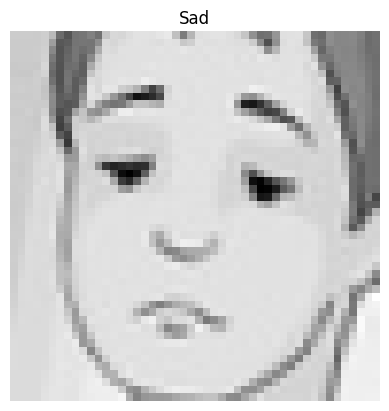

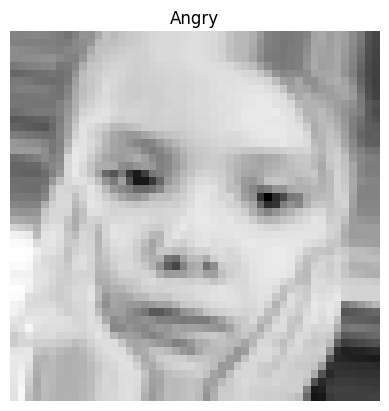

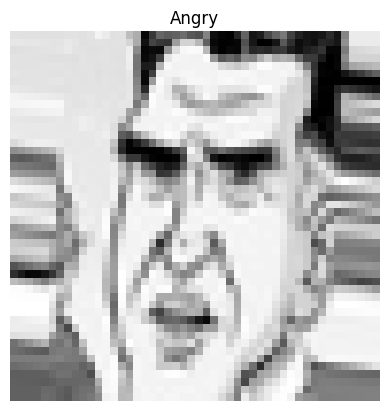

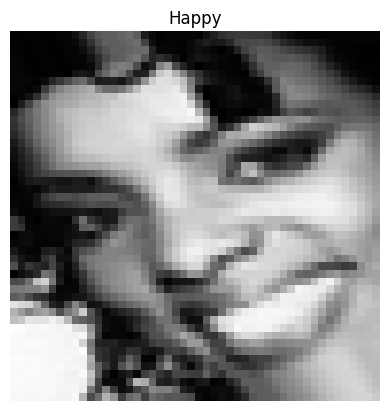

In [23]:
# Plotting the first few images and their labels from the batch
for i in range(5):
    plt.imshow(img[i].reshape(48, 48), cmap='gray')
    plt.title(class_labels[np.argmax(label[i])])
    plt.axis('off')
    plt.show()

In [24]:
train_path = "train/"
test_path = "test/"

In [25]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [26]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [27]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate=  0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [28]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

# epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [29]:
epochs=50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs // BATCH_SIZE,
                    )

Epoch 1/50
897/897 [==============================] - 43s 37ms/step - loss: 1.8608 - accuracy: 0.2616 - val_loss: 1.7399 - val_accuracy: 0.3006
Epoch 2/50
897/897 [==============================] - 37s 41ms/step - loss: 1.6424 - accuracy: 0.3561 - val_loss: 1.5249 - val_accuracy: 0.4205
Epoch 3/50
897/897 [==============================] - 32s 35ms/step - loss: 1.4939 - accuracy: 0.4205 - val_loss: 1.6857 - val_accuracy: 0.3497
Epoch 4/50
897/897 [==============================] - 32s 35ms/step - loss: 1.4197 - accuracy: 0.4526 - val_loss: 1.3750 - val_accuracy: 0.4827
Epoch 5/50
897/897 [==============================] - 40s 44ms/step - loss: 1.3616 - accuracy: 0.4771 - val_loss: 1.4859 - val_accuracy: 0.4424
Epoch 6/50
897/897 [==============================] - 31s 35ms/step - loss: 1.3253 - accuracy: 0.4955 - val_loss: 1.1864 - val_accuracy: 0.5515
Epoch 7/50
897/897 [==============================] - 31s 35ms/step - loss: 1.2971 - accuracy: 0.5036 - val_loss: 1.3110 - val_accuracy:

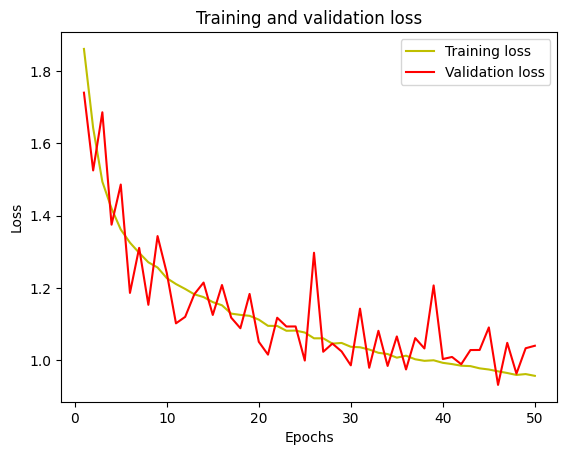

In [33]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

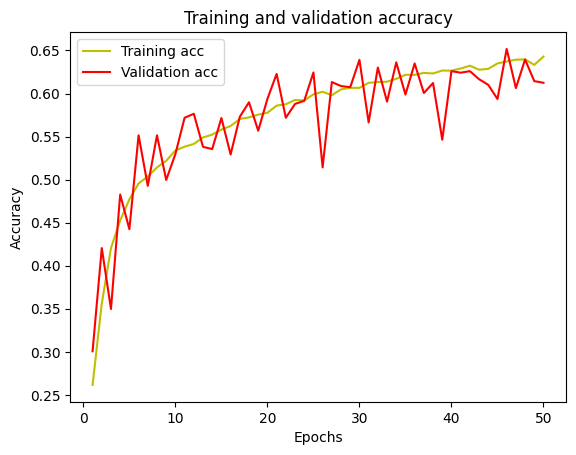

In [35]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
model.save('Human_Emotion_Recog_Model_50epochs.h')

In [36]:
from keras.models import load_model

In [37]:
#Test the model
my_model = load_model('Human_Emotion_Recog_Model_50epochs.h', compile=False)

In [38]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 201ms/step
Accuracy =  0.625


In [39]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

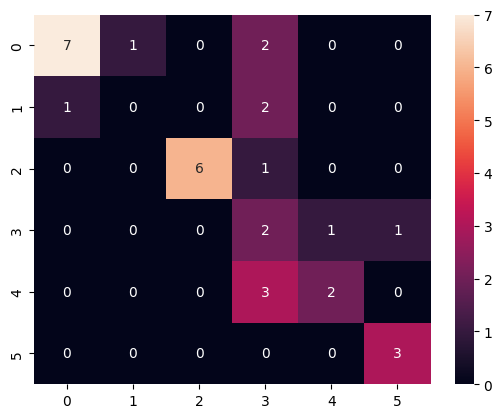

In [40]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

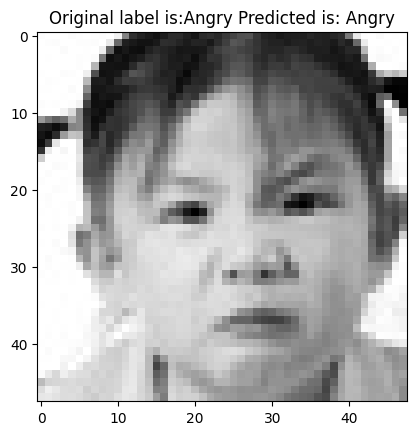

In [41]:
import random
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()